In [10]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [11]:
encoding = 'latin1'

u_path = os.path.expanduser('data/ml-1m/users.dat')
r_path = os.path.expanduser('data/ml-1m/ratings.dat')
m_path = os.path.expanduser('data/ml-1m/movies.dat')

u_names = ['user_id', 'gender', 'age', 'occupation', 'zip']
r_names = ['user_id', 'movie_id', 'rating', 'timestamp']
m_names = ['movie_id', 'title', 'genres']

users = pd.read_csv(u_path, sep='::', header=None, names=u_names, encoding=encoding)
ratings = pd.read_csv(r_path, sep='::', header=None, names=r_names, encoding=encoding)
movies = pd.read_csv(m_path, sep='::', header=None, names=m_names, encoding=encoding)


/home/pj/app/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()
/home/pj/app/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if sys.path[0] == '':
/home/pj/app/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warnin

In [16]:
from time import time
from datetime import datetime

In [18]:
datetime.fromtimestamp(max(ratings.timestamp)), datetime.fromtimestamp(min(ratings.timestamp))

(datetime.datetime(2003, 3, 1, 1, 49, 50),
 datetime.datetime(2000, 4, 26, 7, 5, 32))

In [20]:
ratings.head(20)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [13]:
max(ratings.timestamp), min(ratings.timestamp)

(1046454590, 956703932)

In [125]:
def movie2index():
    movie_ids = {}
    counter = 0
    for movie_id in movies.movie_id:
        movie_ids[movie_id] = counter
        counter += 1
    print(len(movie_ids), len(movies))
    return movie_ids
movie_ids = movie2index()

3883 3883


In [126]:
counter = 0
for index, row in ratings.iterrows():
    row['movie_id'] = movie_ids[row['movie_id']]
max(ratings.movie_id)

In [127]:
res = []
for index, row in ratings.iterrows():
    if row['rating'] > 3:
        res.append([row['user_id'], row['movie_id']])
print(len(res))

575281


In [134]:
# 初始化u2m
t_u2m = {}
for item in res:
    if (item[0] - 1) not in t_u2m:
        t_u2m[item[0] - 1] = [item[1]]
    else:
        t_u2m[item[0] - 1].append(item[1])

# 删除访问次数少于5的用户
_u2m = {}
for u_id in t_u2m:
    if len(t_u2m[u_id]) >= 5:
        _u2m[u_id] = t_u2m[u_id]
print(len(_u2m))

# 讲index变为用户id
u2m = {}
n_uid = 0
for o_uid in range(6040):
    if o_uid in _u2m:
        u2m[n_uid] = _u2m[o_uid]
        n_uid += 1
print(len(u2m), max(u2m.keys()))

6034
6034 6033


In [77]:
test_index = np.random.choice(list(user2movie.keys()), size=(int(len(user2movie) * 0.3), ))

In [148]:
# 初始化train_u2m and test_u2m
train_u2m = {}
test_u2m = {}
for uid in u2m:
    train_u2m[uid] = []
    test_u2m[uid] = []

for uid in u2m:
    # _spliter = int(len(u2m[uid]) * 0.7)
    train_indexs = np.random.choice(len(u2m[uid]),
                                    int(len(u2m[uid]) * 0.7),
                                    replace=False)
    for (i, mid) in enumerate(u2m[uid]):
        if i in train_indexs:
            train_u2m[uid].append(mid)
        else:
            test_u2m[uid].append(mid)
print(train_u2m[1], len(train_u2m[1]))
print(test_u2m[1], len(test_u2m[1]))
print(u2m[1], len(u2m[1]))

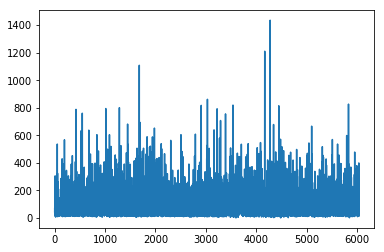

In [91]:
plot_data = []
for (key, items) in res_u2m.items():
    plot_data.append(len(items))
%matplotlib inline
plt.plot(plot_data)